**Actividad PBL 2: Redes Bayesianas**

Autores:


*   Daniel Makoszay Castañón       - A01750046
*   Santiago Jiménez Pasillas      - A01749907
*   Santiago Palavicini Saldívar   - A01749103
*   Ximena Serna Mendoza           - A01749870
*   Guillermo Ian Barbosa Martínez - A01747926

# **Dependencias, librerías y módulos**
**bnlearn**     - Creación, entrenamiento y validación de redes bayesianas.

**Pandas**      - Procesamiento de datos

**ScikitLearn** - Segmentación de la base de datos en datos de entrenamiento y prueba.

**Matplotlib**  - Visualización de las clasificaciones y de la red.

**Seaborn**     - Visualización de las clasificaciones y de la red.

**d3blocks**    - Visualización y comparación interactiva de las redes.

**pgmpy**    - Creación, entrenamiento y validación de redes bayesianas.

In [ ]:
'''
Se importa la biblioteca que nos ayudará a construir el modelo de red bayesiana.
A su vez, nos permitirá obtener las probabilidades condicionales de cada nodo y/o variable.
'''
!pip install bnlearn
import bnlearn as bn

'''
Se importa pandas para el procesamiento de datos antes de su segmentación en datos de entrenamiento y de prueba.
Se importa además numpy para operaciones estadísticas necesarias.
'''
import pandas as pd
import numpy as np

'''
Se importa la librería collections para realizar operaciones u obtener información sobre diccionarios ordenados.
'''
from collections import OrderedDict

'''
Debido a la dependencia se seaborn de matplotlib, la primera librería ya contará con la actualización de matplotlib. Se importa seaborn para
visualizaciones de interés.
'''
import seaborn as sns

'''
Se importa el método train_test_split del módulo model_selection de la librería sklearn para la segmentación de la base de datos.
'''
from sklearn.model_selection import train_test_split

'''
Se importa la segunda biblioteca que nos ayudará a construir el modelo de red bayesiana.
'''
!pip install pgmpy
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

'''
Se importan la bibliotecas para graficar la red bayesiana creada con pgmpy.
'''
!apt-get install -y graphviz libgraphviz-dev pkg-config
!pip install pygraphviz
import networkx as nx
import matplotlib.pyplot as plt

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1

In [ ]:
!pip install d3blocks

# **Importación y procesamiento de los datos**

In [ ]:
pd.set_option('display.max_columns', None)          # Para que se vean todas las columnas durante el preprocesamiento

df = pd.read_csv('/content/drive/MyDrive/chronicDiseaseDataset.csv')        # Se importa la base de datos
df.head()                                            # Se muestran las primeras filas de la base de datos

Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symptom_14 Symptom_15  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

  Symptom_16 Symptom_17  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.tail()                                            # Se muestran las últimas filas de la base de datos

Disease             Symptom_1  \
4915  (vertigo) Paroymsal  Positional Vertigo              vomiting   
4916                                     Acne             skin_rash   
4917                  Urinary tract infection   burning_micturition   
4918                                Psoriasis             skin_rash   
4919                                 Impetigo             skin_rash   

                Symptom_2             Symptom_3                  Symptom_4  \
4915             headache                nausea         spinning_movements   
4916   pus_filled_pimples            blackheads                   scurring   
4917   bladder_discomfort   foul_smell_of urine   continuous_feel_of_urine   
4918           joint_pain          skin_peeling        silver_like_dusting   
4919           high_fever               blister       red_sore_around_nose   

                  Symptom_5            Symptom_6 Symptom_7 Symptom_8  \
4915        loss_of_balance         unsteadiness       NaN       NaN   
4916                    NaN                  NaN       NaN       NaN   
4917                    NaN                  NaN       NaN       NaN   
4918   small_dents_in_nails   inflammatory_nails       NaN       NaN   
4919      yellow_crust_ooze                  NaN       NaN       NaN   

     Symptom_9 Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symptom_14  \
4915       NaN        NaN        NaN        NaN        NaN        NaN   
4916       NaN        NaN        NaN        NaN        NaN        NaN   
4917       NaN        NaN        NaN        NaN        NaN        NaN   
4918       NaN        NaN        NaN        NaN        NaN        NaN   
4919       NaN        NaN        NaN        NaN        NaN        NaN   

     Symptom_15 Symptom_16 Symptom_17  
4915        NaN        NaN        NaN  
4916        NaN        NaN        NaN  
4917        NaN        NaN        NaN  
4918        NaN        NaN        NaN  
4919        NaN        NaN        NaN

In [ ]:
df.sample(5)                                         # Se muestran 5 filas aleatorias de la base de datos

Disease    Symptom_1        Symptom_2        Symptom_3  \
4533          Hepatitis E   joint_pain         vomiting          fatigue   
3591  Alcoholic hepatitis     vomiting   yellowish_skin   abdominal_pain   
3212             Jaundice      itching         vomiting          fatigue   
4708      Osteoarthristis   joint_pain        neck_pain        knee_pain   
593               Typhoid       chills         vomiting          fatigue   

                 Symptom_4               Symptom_5  \
4533            high_fever          yellowish_skin   
3591   swelling_of_stomach   distention_of_abdomen   
3212           weight_loss              high_fever   
4708        hip_joint_pain         swelling_joints   
593             high_fever                headache   

                            Symptom_6        Symptom_7          Symptom_8  \
4533                       dark_urine           nausea   loss_of_appetite   
3591   history_of_alcohol_consumption   fluid_overload                NaN   
3212                   yellowish_skin       dark_urine     abdominal_pain   
4708                  painful_walking              NaN                NaN   
593                            nausea     constipation          diarrhoea   

                 Symptom_9          Symptom_10            Symptom_11  \
4533        abdominal_pain   yellowing_of_eyes   acute_liver_failure   
3591                   NaN                 NaN                   NaN   
3212                   NaN                 NaN                   NaN   
4708                   NaN                 NaN                   NaN   
593    toxic_look_(typhos)          belly_pain                   NaN   

     Symptom_12         Symptom_13 Symptom_14 Symptom_15 Symptom_16 Symptom_17  
4533       coma   stomach_bleeding        NaN        NaN        NaN        NaN  
3591        NaN                NaN        NaN        NaN        NaN        NaN  
3212        NaN                NaN        NaN        NaN        NaN        NaN  
4708        NaN                NaN        NaN        NaN        NaN        NaN  
593         NaN                NaN        NaN        NaN        NaN        NaN

In [ ]:
cols = list(df.columns)                                             # Se obtienen los nombres de las columnas de la base de datos
symptoms = []                                                       # Se crea una lista vacía para almacenar los síntomas de todo el dataset

for col in cols[1:]:                                                # Se recorren las columnas (desde la 2, pues la 1 corresponde a enfermedades)
  symptoms += list(df[col].values)                                  # Se agregan los síntomas observados

symptoms2 = []                                                      # Se crea una lista vacía para almacenar los síntomas únicos de todo el dataset
for symptom in symptoms:                                            # Se recorren los síntomas
  if type(symptom) == str and symptom not in ['nan', ' nan']:       # Nos aseguramos de que sean strings únicamente
    if symptom == 'itching' and symptom not in symptoms2:           # Si el síntoma es 'itching' y no ha sido agregado, se añade a la lista
      symptoms2 += [symptom]
    else:
      if symptom[1:] not in symptoms2 and symptom[1:] != 'tching':  # Al no ser 'itching', se debe quitar el ' ' y agregar asegurándose de que esté aún
        symptoms2 += [symptom[1:]]
  else:
    symptoms.remove(symptom)                                        # Si no es un string, se elimina de la lista

diseases = df['Disease'].values                                     # Se obtienen todas las enfermedades observadas en el dataset

data = {'Disease': diseases}                                        # Se crea un diccionario con la estructura de la base de datos

for symptom in symptoms2:
  data[symptom] = np.array([np.nan for _ in range(len(df))])        # Inicialmente se contará con datos nulos para cambiarlo posteriormente

df2 = pd.DataFrame(data=data)                                       # Se crea el dataframe a partir del diccionario, con enfermedades y síntomas
df2                                                                 # Se muestran los primeros datos del dataframe

Disease  itching  skin_rash  \
0                            Fungal infection      NaN        NaN   
1                            Fungal infection      NaN        NaN   
2                            Fungal infection      NaN        NaN   
3                            Fungal infection      NaN        NaN   
4                            Fungal infection      NaN        NaN   
...                                       ...      ...        ...   
4915  (vertigo) Paroymsal  Positional Vertigo      NaN        NaN   
4916                                     Acne      NaN        NaN   
4917                  Urinary tract infection      NaN        NaN   
4918                                Psoriasis      NaN        NaN   
4919                                 Impetigo      NaN        NaN   

      continuous_sneezing  shivering  stomach_pain  acidity  vomiting  \
0                     NaN        NaN           NaN      NaN       NaN   
1                     NaN        NaN           NaN      NaN       NaN   
2                     NaN        NaN           NaN      NaN       NaN   
3                     NaN        NaN           NaN      NaN       NaN   
4                     NaN        NaN           NaN      NaN       NaN   
...                   ...        ...           ...      ...       ...   
4915                  NaN        NaN           NaN      NaN       NaN   
4916                  NaN        NaN           NaN      NaN       NaN   
4917                  NaN        NaN           NaN      NaN       NaN   
4918                  NaN        NaN           NaN      NaN       NaN   
4919                  NaN        NaN           NaN      NaN       NaN   

      indigestion  muscle_wasting  patches_in_throat  fatigue  weight_loss  \
0             NaN             NaN                NaN      NaN          NaN   
1             NaN             NaN                NaN      NaN          NaN   
2             NaN             NaN                NaN      NaN          NaN   
3             NaN             NaN                NaN      NaN          NaN   
4             NaN             NaN                NaN      NaN          NaN   
...           ...             ...                ...      ...          ...   
4915          NaN             NaN                NaN      NaN          NaN   
4916          NaN             NaN                NaN      NaN          NaN   
4917          NaN             NaN                NaN      NaN          NaN   
4918          NaN             NaN                NaN      NaN          NaN   
4919          NaN             NaN                NaN      NaN          NaN   

      sunken_eyes  cough  headache  chest_pain  back_pain  weakness_in_limbs  \
0             NaN    NaN       NaN         NaN        NaN                NaN   
1             NaN    NaN       NaN         NaN        NaN                NaN   
2             NaN    NaN       NaN         NaN        NaN                NaN   
3             NaN    NaN       NaN         NaN        NaN                NaN   
4             NaN    NaN       NaN         NaN        NaN                NaN   
...           ...    ...       ...         ...        ...                ...   
4915          NaN    NaN       NaN         NaN        NaN                NaN   
4916          NaN    NaN       NaN         NaN        NaN                NaN   
4917          NaN    NaN       NaN         NaN        NaN                NaN   
4918          NaN    NaN       NaN         NaN        NaN                NaN   
4919          NaN    NaN       NaN         NaN        NaN                NaN   

      chills  joint_pain  yellowish_skin  constipation  \
0        NaN         NaN             NaN           NaN   
1        NaN         NaN             NaN           NaN   
2        NaN         NaN             NaN           NaN   
3        NaN         NaN             NaN           NaN   
4        NaN         NaN             NaN           NaN   
...      ...         ...             ...           ...   
4915     NaN         NaN    

In [ ]:
cols2 = list(df2.columns)                                             # Se obtienen los nombres de las columnas del nuevo dataframe

# Se itera en cada renglón del dataset original, cuyos índices y enfermedades coinciden con el nuevo
for _, prognosis in df.iterrows():
  for col in cols[1:]:                                                # Se recorren todas las columnas del dataset original comenzando en Symptom_1
    symptom = prognosis[col]                                          # Se accede a uno de los síntomas registrados
    if symptom == 'itching':                                          # Si el síntoma es 'itching', se marca 1 en el nuevo dataframe
      df2.iloc[_,1] = 1
    else:                                                             # Es otro síntoma, o bien, un valor nulo
      if symptom not in ['nan', ' nan'] and type(symptom) == str:     # Si es string, se obtiene su índice en el df nuevo
        i = cols2.index(symptom[1:])                                  # y se marca 1 en la celda correspondiente a [registro de enfermedad, síntoma]
        df2.iloc[_,i] = 1

df2.fillna(0, inplace=True)                                            # Para no trabajar con datos nulos son llenados como 0s
for col in cols2[1:]:
  df2[col] = df2[col].astype(int)                                     # Los datos son convertidos a valores enteros y no flotantes
df2.set_index('Disease', inplace=True)                                # Se establece la columna de enfermedades como índice
df2

itching  skin_rash  \
Disease                                                       
Fungal infection                               1          1   
Fungal infection                               0          1   
Fungal infection                               1          0   
Fungal infection                               1          1   
Fungal infection                               1          1   
...                                          ...        ...   
(vertigo) Paroymsal  Positional Vertigo        0          0   
Acne                                           0          1   
Urinary tract infection                        0          0   
Psoriasis                                      0          1   
Impetigo                                       0          1   

                                         continuous_sneezing  shivering  \
Disease                                                                   
Fungal infection                                           0          0   
Fungal infection                                           0          0   
Fungal infection                                           0          0   
Fungal infection                                           0          0   
Fungal infection                                           0          0   
...                                                      ...        ...   
(vertigo) Paroymsal  Positional Vertigo                    0          0   
Acne                                                       0          0   
Urinary tract infection                                    0          0   
Psoriasis                                                  0          0   
Impetigo                                                   0          0   

                                         stomach_pain  acidity  vomiting  \
Disease                                                                    
Fungal infection                                    0        0         0   
Fungal infection                                    0        0         0   
Fungal infection                                    0        0         0   
Fungal infection                                    0        0         0   
Fungal infection                                    0        0         0   
...                                               ...      ...       ...   
(vertigo) Paroymsal  Positional Vertigo             0        0         1   
Acne                                                0        0         0   
Urinary tract infection                             0        0         0   
Psoriasis                                           0        0         0   
Impetigo                                            0        0         0   

                                         indigestion  muscle_wasting  \
Disease                                                                
Fungal infection                                   0               0   
Fungal infection                                   0               0   
Fungal infection                                   0               0   
Fungal infection                                   0               0   
Fungal infection                                   0               0   
...                                              ...             ...   
(vertigo) Paroymsal  Positional Vertigo            0               0   
Acne                                               0               0   
Urinary tract infection                            0               0   
Psoriasis                                          0               0   
Impetigo                                           0               0   

                                         patches_in_throat  fatigue  \
Disease                                                               
Fungal infection                                         0        0   
Fungal infection                                         0        0   
Fungal infection                   

# **Segmentación de datos de entrenamiento y prueba**

In [ ]:
rows = []                       # Se tomarán todos los registros (renglones) individuales del dataset

for x in range(len(df2)):
  rows += [list(df2.iloc[x])]

X = rows                        # Para construir el modelo probabilístico de la red bayesiana, es necesario contar con sus registros
y = list(df2.index)             # Se asignan a Y, como variable a predecir, las enfermedades diagnosticadas o pronosticadas

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=1) # Segmentación en datos de entrenamiento - validación

df_train = pd.DataFrame(data=X_train, columns=cols2[1:], index=y_train)                   # Dataset de entrenamiento
df_test = pd.DataFrame(data=X_test, columns=cols2[1:], index=y_test)                      # Dataset de prueba
df_train

itching  skin_rash  continuous_sneezing  shivering  \
GERD                           0          0                    0          0   
Chronic cholestasis            1          0                    0          0   
Urinary tract infection        0          0                    0          0   
Psoriasis                      0          1                    0          0   
AIDS                           0          0                    0          0   
...                          ...        ...                  ...        ...   
Tuberculosis                   0          0                    0          0   
Chicken pox                    1          1                    0          0   
Gastroenteritis                0          0                    0          0   
Chronic cholestasis            1          0                    0          0   
Hepatitis E                    0          0                    0          0   

                         stomach_pain  acidity  vomiting  indigestion  \
GERD                                1        1         1            0   
Chronic cholestasis                 0        0         1            0   
Urinary tract infection             0        0         0            0   
Psoriasis                           0        0         0            0   
AIDS                                0        0         0            0   
...                               ...      ...       ...          ...   
Tuberculosis                        0        0         1            0   
Chicken pox                         0        0         0            0   
Gastroenteritis                     0        0         1            0   
Chronic cholestasis                 0        0         1            0   
Hepatitis E                         0        0         1            0   

                         muscle_wasting  patches_in_throat  fatigue  \
GERD                                  0                  0        0   
Chronic cholestasis                   0                  0        0   
Urinary tract infection               0                  0        0   
Psoriasis                             0                  0        0   
AIDS                                  1                  1        0   
...                                 ...                ...      ...   
Tuberculosis                          0                  0        1   
Chicken pox                           0                  0        1   
Gastroenteritis                       0                  0        0   
Chronic cholestasis                   0                  0        0   
Hepatitis E                           0                  0        0   

                         weight_loss  sunken_eyes  cough  headache  \
GERD                               0            0      1         0   
Chronic cholestasis                0            0      0         0   
Urinary tract infection            0            0      0         0   
Psoriasis                          0            0      0         0   
AIDS                               0            0      0         0   
...                              ...          ...    ...       ...   
Tuberculosis                       1            0      1         0   
Chicken pox                        0            0      0         1   
Gastroenteritis                    0            1      0         0   
Chronic cholestasis                0            0      0         0   
Hepatitis E                        0            0      0         0   

                         chest_pain  back_pain  weakness_in_limbs  chills  \
GERD                              1          0                  0       0   
Chronic cholestasis               0          0                  0       0   
Urinary tract infection           0          0                  0       0   
Psoriasis                         0          0                  0       0   
AIDS                              0          0                  0       0   
...                             ...        

In [ ]:
df_test

itching  skin_rash  \
Urinary tract infection                        0          0   
Gastroenteritis                                0          0   
Hypothyroidism                                 0          0   
Chicken pox                                    1          1   
Cervical spondylosis                           0          0   
...                                          ...        ...   
Varicose veins                                 0          0   
Migraine                                       0          0   
(vertigo) Paroymsal  Positional Vertigo        0          0   
Bronchial Asthma                               0          0   
Pneumonia                                      0          0   

                                         continuous_sneezing  shivering  \
Urinary tract infection                                    0          0   
Gastroenteritis                                            0          0   
Hypothyroidism                                             0          0   
Chicken pox                                                0          0   
Cervical spondylosis                                       0          0   
...                                                      ...        ...   
Varicose veins                                             0          0   
Migraine                                                   0          0   
(vertigo) Paroymsal  Positional Vertigo                    0          0   
Bronchial Asthma                                           0          0   
Pneumonia                                                  0          0   

                                         stomach_pain  acidity  vomiting  \
Urinary tract infection                             0        0         0   
Gastroenteritis                                     0        0         1   
Hypothyroidism                                      0        0         0   
Chicken pox                                         0        0         0   
Cervical spondylosis                                0        0         0   
...                                               ...      ...       ...   
Varicose veins                                      0        0         0   
Migraine                                            0        1         0   
(vertigo) Paroymsal  Positional Vertigo             0        0         1   
Bronchial Asthma                                    0        0         0   
Pneumonia                                           0        0         0   

                                         indigestion  muscle_wasting  \
Urinary tract infection                            0               0   
Gastroenteritis                                    0               0   
Hypothyroidism                                     0               0   
Chicken pox                                        0               0   
Cervical spondylosis                               0               0   
...                                              ...             ...   
Varicose veins                                     0               0   
Migraine                                           1               0   
(vertigo) Paroymsal  Positional Vertigo            0               0   
Bronchial Asthma                                   0               0   
Pneumonia                                          0               0   

                                         patches_in_throat  fatigue  \
Urinary tract infection                                  0        0   
Gastroenteritis                                          0        0   
Hypothyroidism                                           0        1   
Chicken pox                                              0        0   
Cervical spondylosis                                     0        0   
...                                                    ...      ...   
Varicose veins                                           0        1   
Migraine                             

**Mapas de Calor de los Datasets de Entrenamiento y Validación**

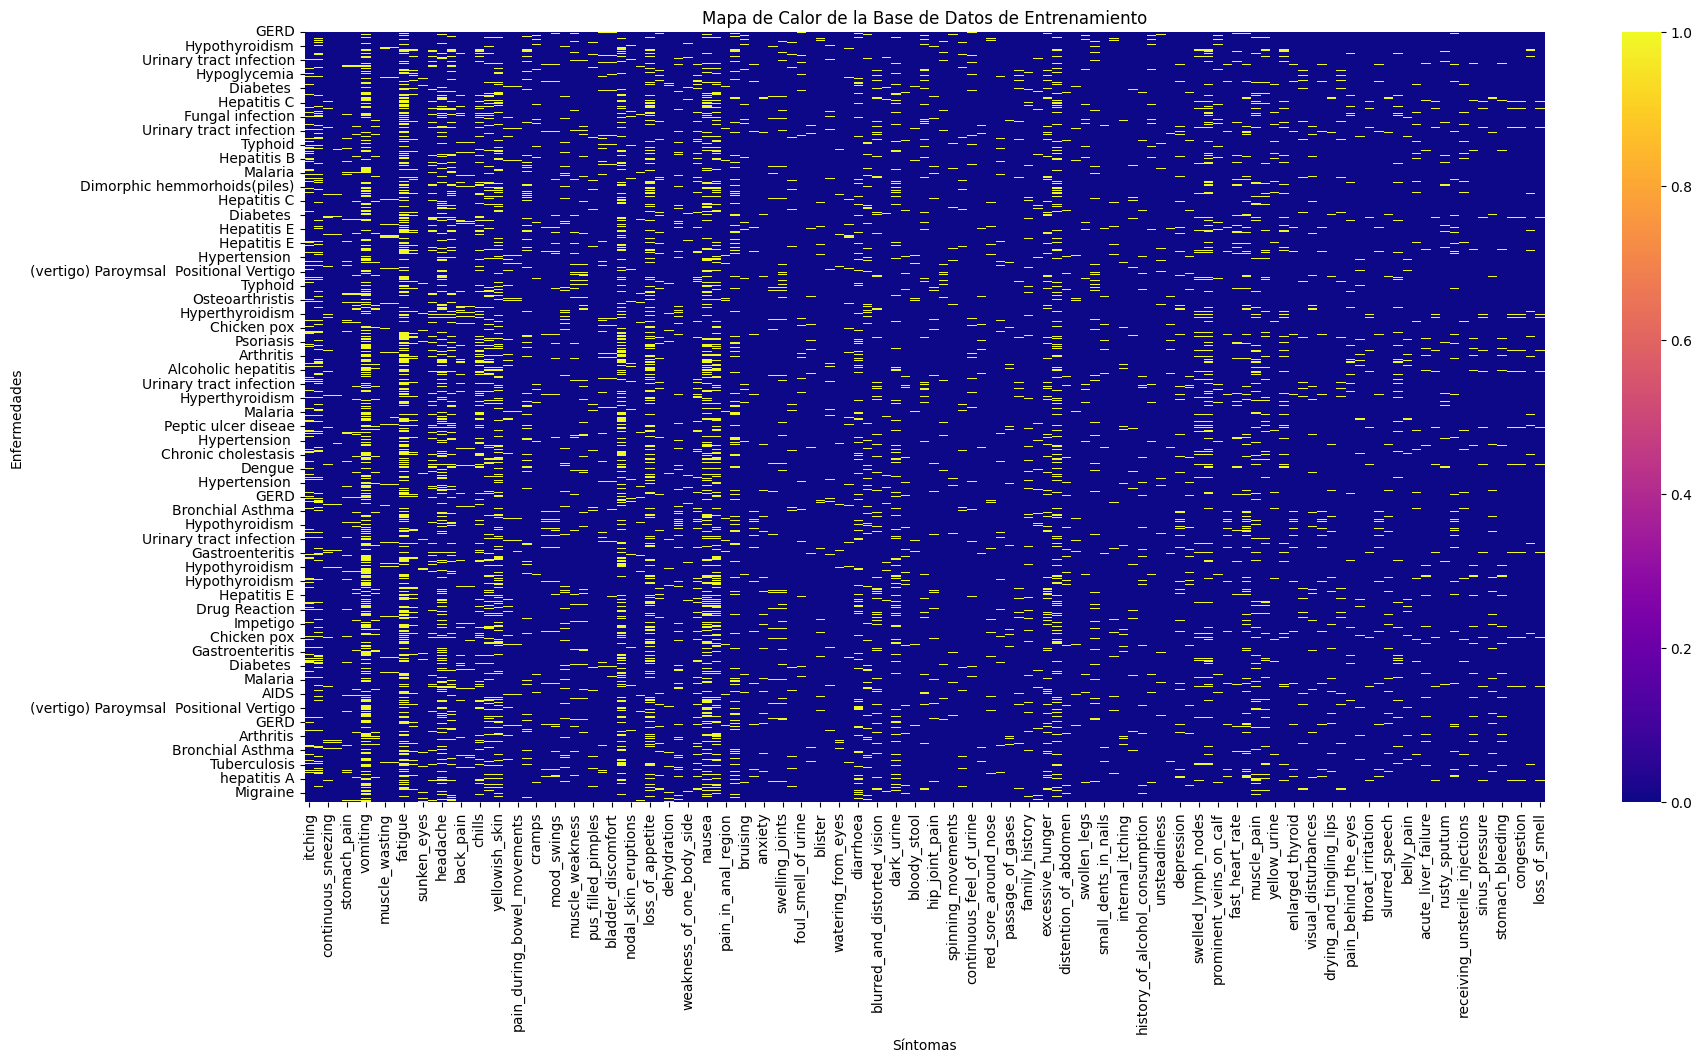

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("tableau-colorblind10")
plt.figure(figsize=(20,10))
heatmap_train = sns.heatmap(df_train, cmap='plasma')
plt.title('Mapa de Calor de la Base de Datos de Entrenamiento')
plt.xlabel('Síntomas')
plt.ylabel('Enfermedades')

# Guardar la imagen antes de mostrarla
plt.savefig('heatmap_entrenamiento.png', dpi=300, bbox_inches='tight')

plt.show()

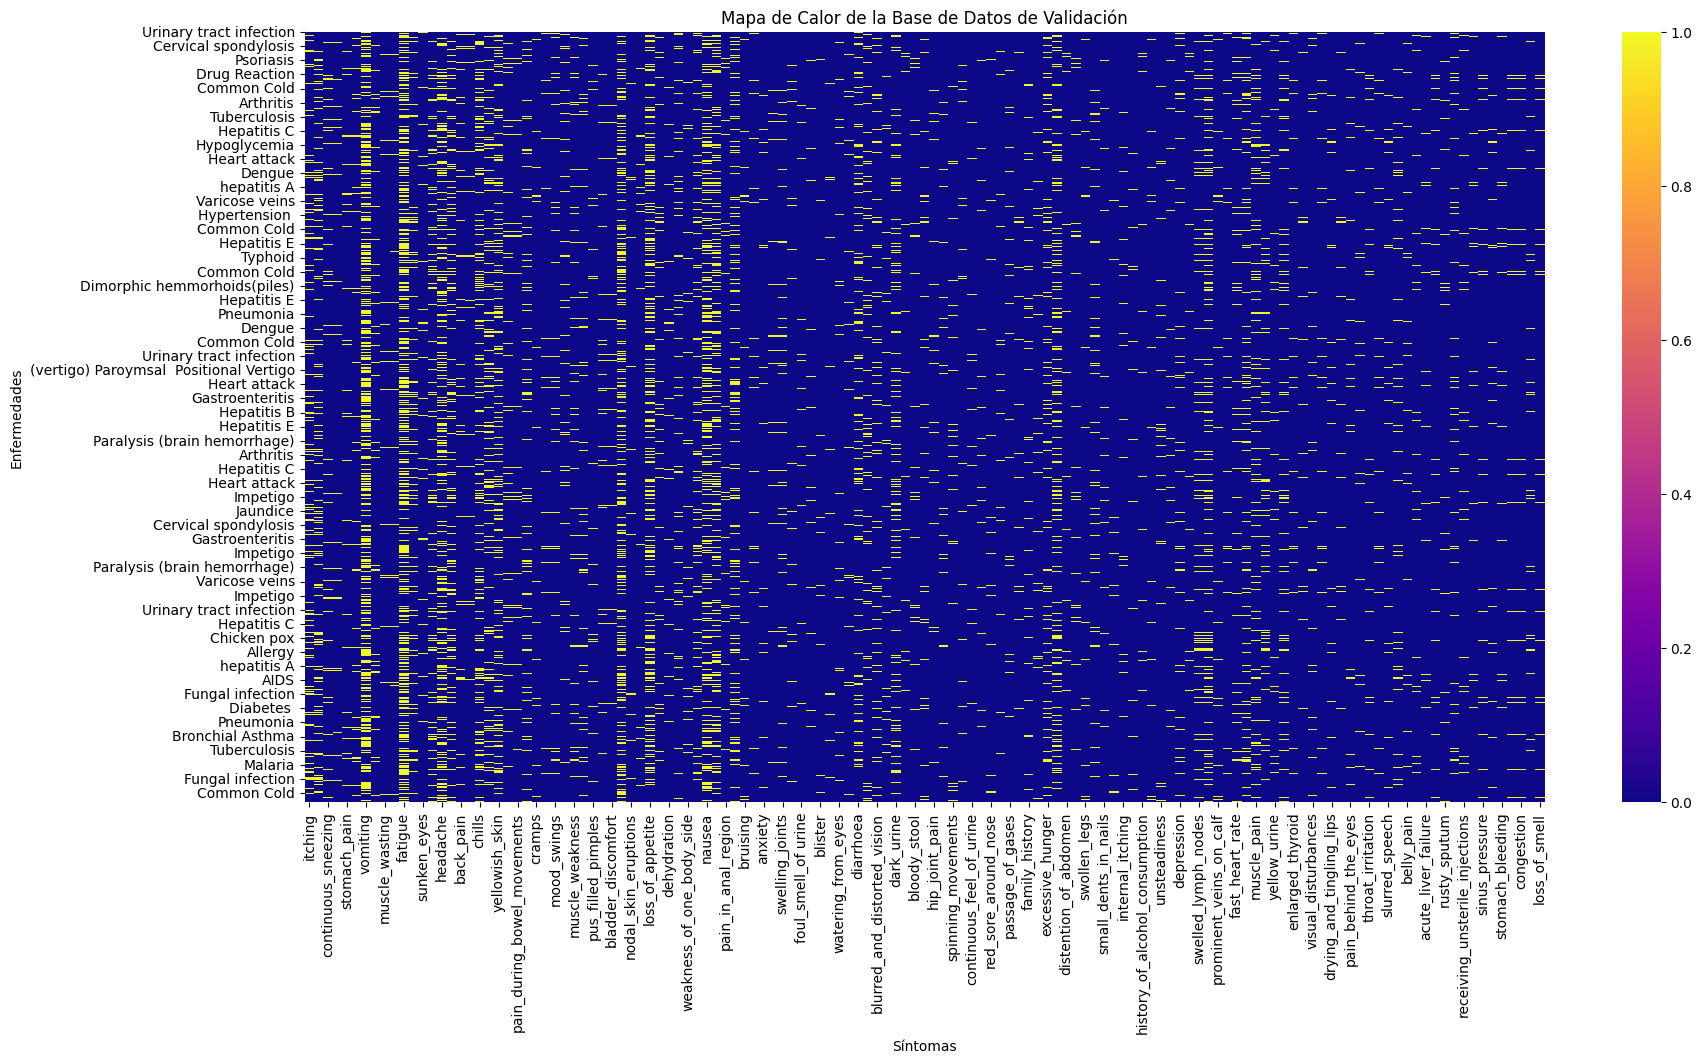

In [ ]:
plt.figure(figsize=(20,10))
heatmap_test = sns.heatmap(df_test, cmap='plasma')
plt.title('Mapa de Calor de la Base de Datos de Validación')
plt.xlabel('Síntomas')
plt.ylabel('Enfermedades')

# Guardar la imagen antes de mostrarla
plt.savefig('heatmap_validacion.png', dpi=300, bbox_inches='tight')

plt.show()

**Visualización de las correlaciones**

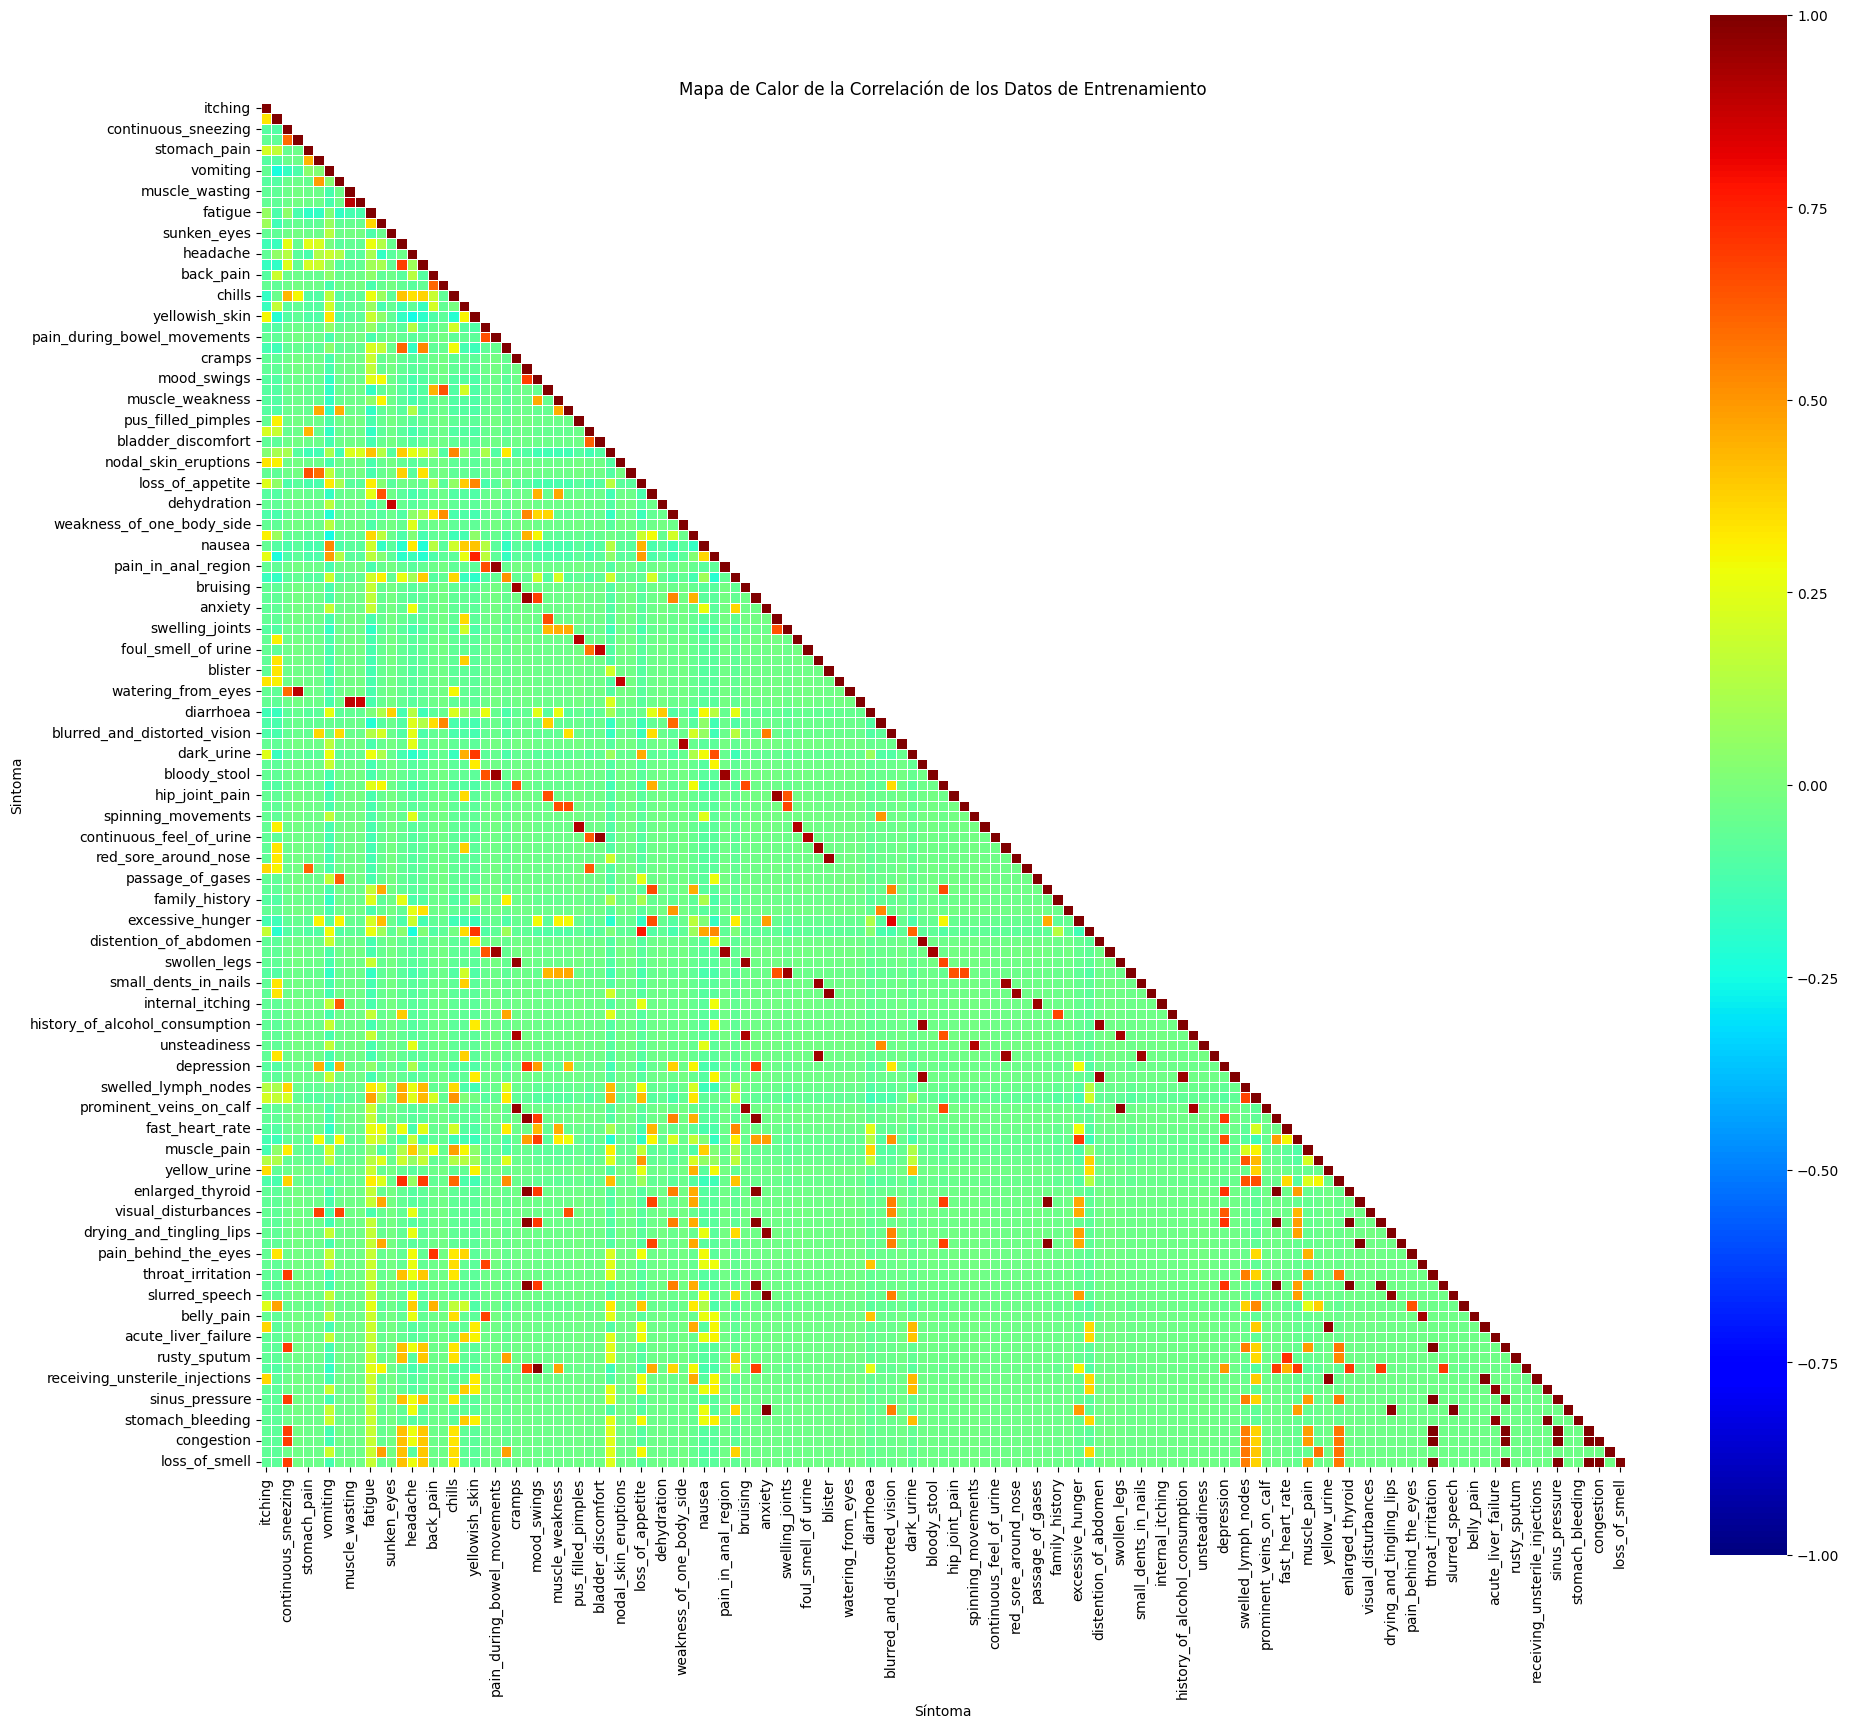

In [ ]:
s# Gráfica de correlación de datos de entrenamiento
train_corr = df_train.corr()                                              # Matriz de Correlación
plt.figure(figsize=(22,20))
df_lt = train_corr.where(np.tril(np.ones(train_corr.shape)).astype(bool)) # Matriz sin repeticiones
train_corr_fig = sns.heatmap(df_lt, cmap='jet', vmin=-1, vmax=1, center = 0, fmt=".2f", square=True, linewidths=.5)
plt.title('Mapa de Calor de la Correlación de los Datos de Entrenamiento')
plt.xlabel('Síntoma')
plt.ylabel('Sintoma')

# Guardar la imagen antes de mostrarla
plt.savefig('train_corr.png', dpi=300, bbox_inches='tight')

plt.show()

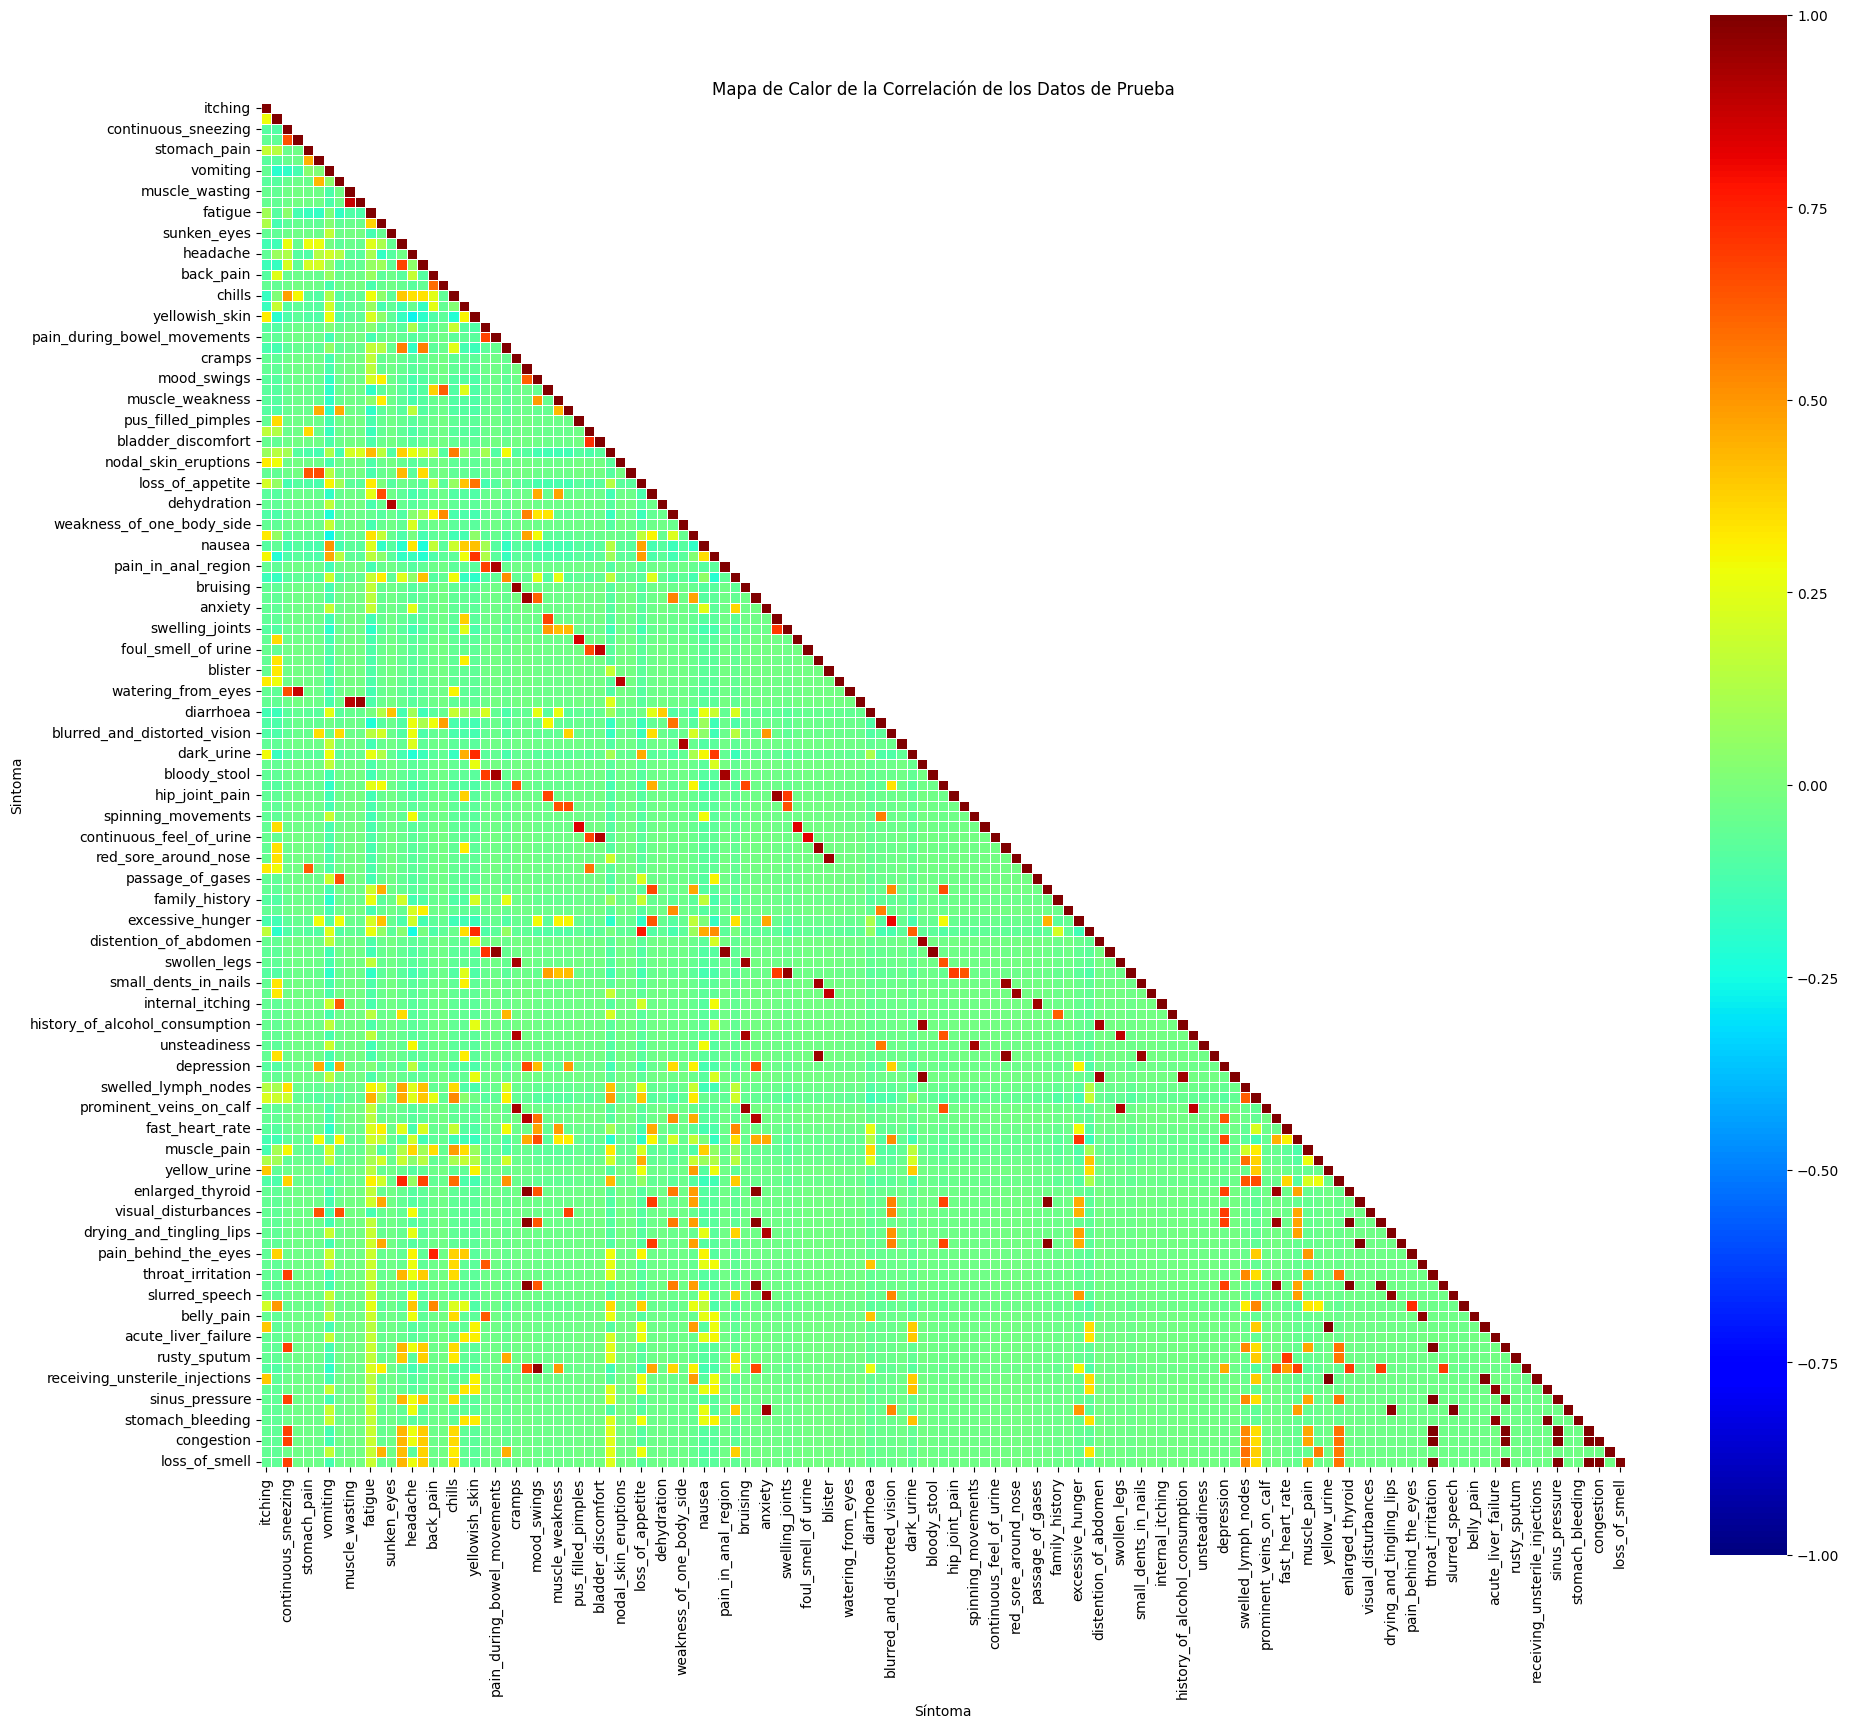

In [ ]:
# Gráfica de correlación de datos de prueba
test_corr = df_test.corr()                                              # Matriz de Correlación
plt.figure(figsize=(22,20))
df_lt = test_corr.where(np.tril(np.ones(test_corr.shape)).astype(bool)) # Matriz sin repeticiones
sns.heatmap(df_lt, cmap='jet', vmin=-1, vmax=1, center = 0, fmt=".2f", square=True, linewidths=.5)
plt.title('Mapa de Calor de la Correlación de los Datos de Prueba')
plt.xlabel('Síntoma')
plt.ylabel('Sintoma')

# Guardar la imagen antes de mostrarla
plt.savefig('test_corr.png', dpi=300, bbox_inches='tight')

plt.show()

# **Modelo: *Chow Liu***

**Modelo DAG Entrenamiento**

In [ ]:
df_train.reset_index(inplace=True)                            # Se reestablecen de ambos dataframes
df_train = df_train.rename(columns = {'index': 'Prognosis'})

df_test.reset_index(inplace=True)
df_test = df_test.rename(columns = {'index': 'Prognosis'})

dag_train = bn.structure_learning.fit(df_train,  methodtype = 'cl',  root_node = 'Prognosis')
bn.plot(dag_train, interactive=True, params_interactive = {'height':'800px', 'width':'70%', 'layout':None, 'bgcolor':'#0f0f0f0f'})

[bnlearn] >Computing best DAG using [chow-liu]


Building tree:   0%|          | 0/8646.0 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores for model comparison (higher is better).


[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Converting source-target into adjacency matrix..
[d3blocks] >INFO> Making the matrix symmetric..
[d3blocks] >INFO> Set directed=True to see the markers!
[d3blocks] >INFO> Keep only edges with weight>0


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.


[d3blocks] >INFO> Converting source-target into adjacency matrix..
[d3blocks] >INFO> Making the matrix symmetric..
[d3blocks] >INFO> Converting adjacency matrix into source-target..
[d3blocks] >INFO> Number of unique nodes: 132
[d3blocks] >INFO> Slider range is set to [0, 1]
[d3blocks] >INFO> Write to path: [/tmp/tmpb1xky59v/d3graph.html]
[d3blocks] >INFO> File already exists and will be overwritten: [/tmp/tmpb1xky59v/d3graph.html]
[d3blocks] >INFO> Keep only edges with weight>0
[d3blocks] >INFO> Converting source-target into adjacency matrix..
[d3blocks] >INFO> Making the matrix symmetric..
[d3blocks] >INFO> Number of unique nodes: 132
[d3blocks] >INFO> Slider range is set to [0, 1]
[d3blocks] >INFO> Write to path: [/tmp/tmp15c30ssx/bnlearn_Directed_Acyclic_Graph_(DAG).html]
[d3blocks] >INFO> File already exists and will be overwritten: [/tmp/tmp15c30ssx/bnlearn_Directed_Acyclic_Graph_(DAG).html]


{'fig': '/tmp/tmp15c30ssx/bnlearn_Directed_Acyclic_Graph_(DAG).html',
 'ax': '/tmp/tmp15c30ssx/bnlearn_Directed_Acyclic_Graph_(DAG).html',
 'pos': None,
 'G': <networkx.classes.digraph.DiGraph at 0x7dc8c05272e0>,
 'node_properties': {'Prognosis': {'node_color': '#1f456e', 'node_size': 10},
  'fatigue': {'node_color': '#1f456e', 'node_size': 10},
  'vomiting': {'node_color': '#1f456e', 'node_size': 10},
  'high_fever': {'node_color': '#1f456e', 'node_size': 10},
  'loss_of_appetite': {'node_color': '#1f456e', 'node_size': 10},
  'nausea': {'node_color': '#1f456e', 'node_size': 10},
  'headache': {'node_color': '#1f456e', 'node_size': 10},
  'abdominal_pain': {'node_color': '#1f456e', 'node_size': 10},
  'yellowish_skin': {'node_color': '#1f456e', 'node_size': 10},
  'yellowing_of_eyes': {'node_color': '#1f456e', 'node_size': 10},
  'chills': {'node_color': '#1f456e', 'node_size': 10},
  'skin_rash': {'node_color': '#1f456e', 'node_size': 10},
  'malaise': {'node_color': '#1f456e', 'node

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


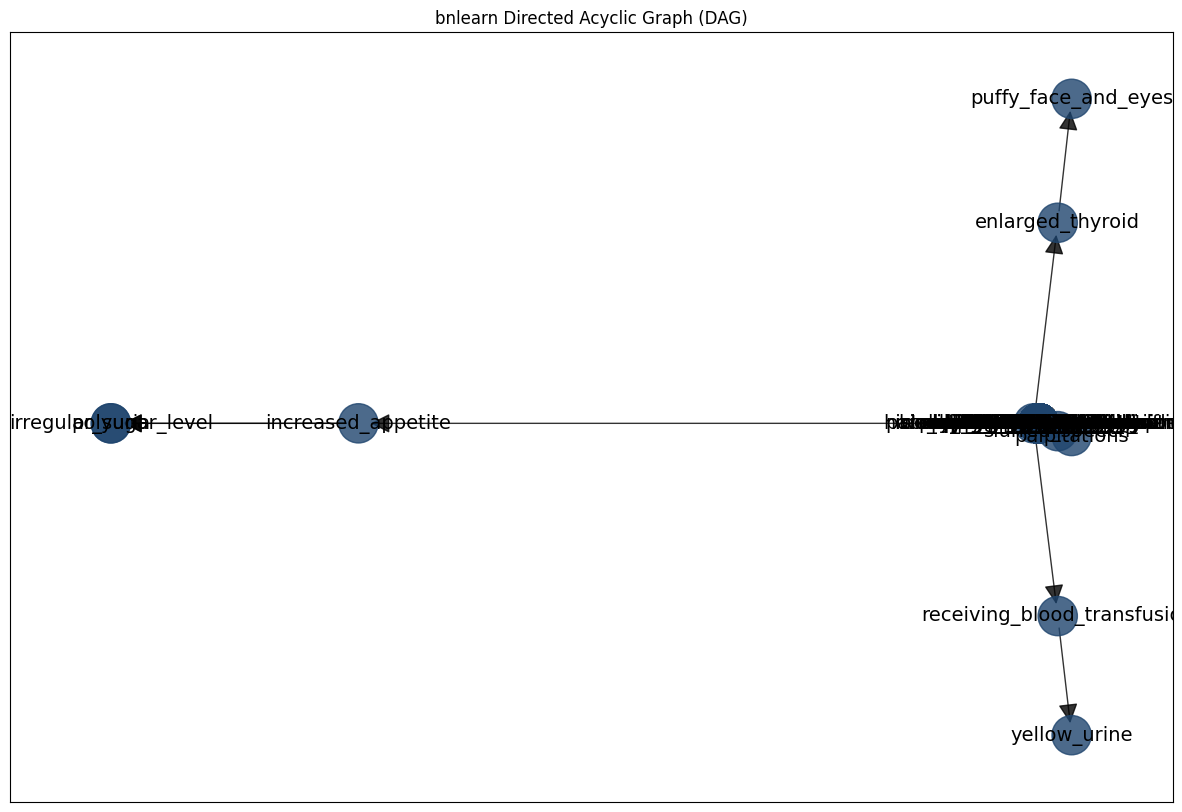

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'Prognosis': array([ 1.44539431e-02, -3.41381082e-17]),
  'fatigue': array([1.98577741e-02, 1.00602861e-17]),
  'vomiting': array([ 1.98577741e-02, -8.46027565e-17]),
  'high_fever': array([ 1.98577741e-02, -4.20791697e-17]),
  'loss_of_appetite': array([1.98577741e-02, 2.16160409e-18]),
  'nausea': array([ 1.98577741e-02, -4.00827359e-17]),
  'headache': array([ 1.98577741e-02, -8.27136509e-17]),
  'abdominal_pain': array([ 1.98577741e-02, -5.35081927e-17]),
  'yellowish_skin': array([1.98577741e-02, 7.43823097e-18]),
  'yellowing_of_eyes': array([ 1.98577741e-02, -1.71439355e-16]),
  'chills': array([ 1.98577741e-02, -3.18174450e-17]),
  'skin_rash': array([ 1.98577741e-02, -7.45500386e-17]),
  'malaise': array([ 1.98577741e-02, -1.37534860e-16]),
  'chest_pain': array([1.98577741e-02, 2.71440291e-17]),
  'joint_pain': array([ 1.98577741e-02, -3.35814924e-17]),
  'itching': array([ 1.985

In [ ]:
bn.plot(dag_train)

In [ ]:
model_train = bn.parameter_learning.fit(dag_train, df_train)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Prognosis:
+----------------------------------------------------+-----------+
| Prognosis((vertigo) Paroymsal  Positional Vertigo) | 0.0228151 |
+----------------------------------------------------+-----------+
| Prognosis(AIDS)                                    | 0.0255154 |
+----------------------------------------------------+-----------+
| Prognosis(Acne)                                    | 0.0237152 |
+----------------------------------------------------+-----------+
| Prognosis(Alcoholic hepatitis)                     | 0.0259654 |
+----------------------------------------------------+-----------+
| Prognosis(Allergy)                                 | 0.0234902 |
+----------------------------------------------------+-----------+
| Prognosis(Arthritis)                  

**Validación del modelo**

In [ ]:
dag_test = bn.structure_learning.fit(df_test,  methodtype = 'cl', root_node = 'Prognosis')

[bnlearn] >Computing best DAG using [chow-liu]


Building tree:   0%|          | 0/8646.0 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores for model comparison (higher is better).


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


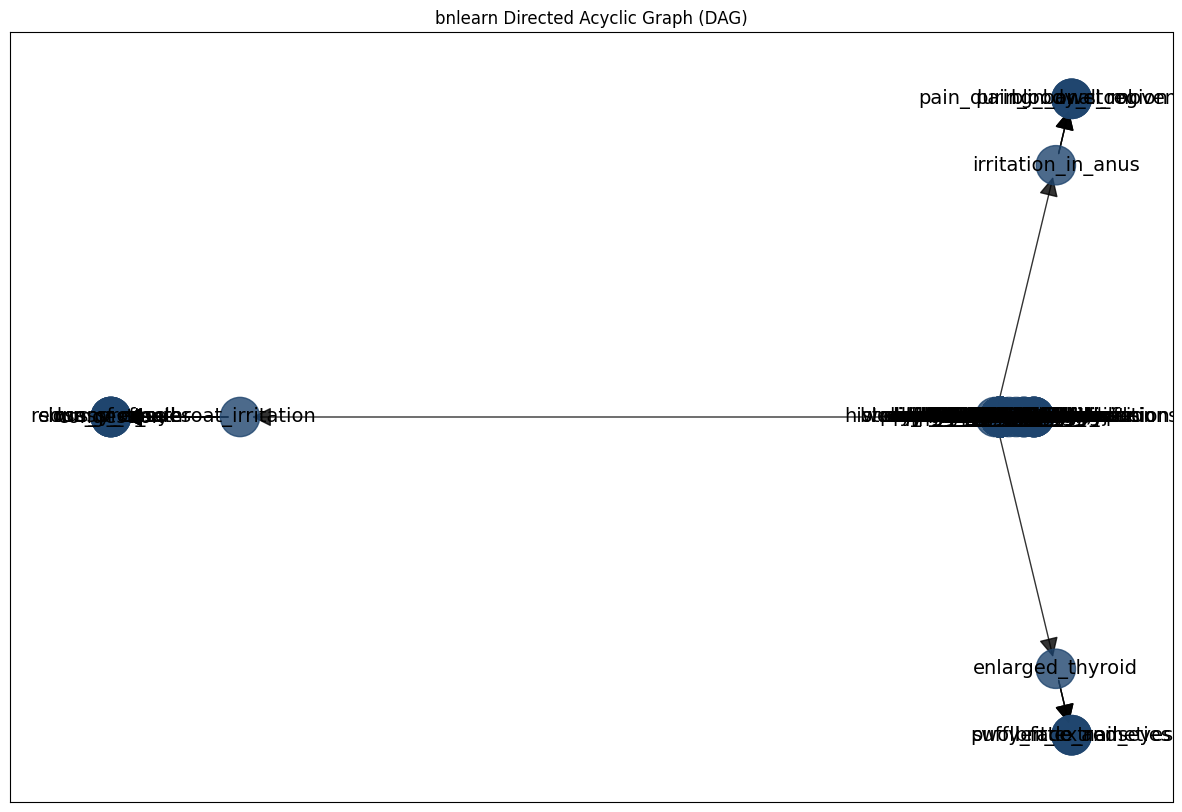

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'Prognosis': array([3.28452210e-02, 7.44762102e-17]),
  'fatigue': array([3.8677743e-02, 3.5669879e-16]),
  'vomiting': array([3.86777430e-02, 3.34509845e-16]),
  'high_fever': array([ 3.86777430e-02, -8.08893777e-18]),
  'loss_of_appetite': array([3.86777430e-02, 1.79669108e-16]),
  'nausea': array([3.86777430e-02, 2.91250985e-17]),
  'headache': array([3.86777430e-02, 2.01386527e-16]),
  'abdominal_pain': array([3.86777430e-02, 1.36684492e-16]),
  'yellowish_skin': array([ 3.86777430e-02, -1.77851956e-17]),
  'yellowing_of_eyes': array([ 3.86777430e-02, -1.51153247e-16]),
  'chills': array([3.86777430e-02, 1.85562078e-16]),
  'malaise': array([ 3.86777430e-02, -2.19042407e-16]),
  'chest_pain': array([ 3.86777430e-02, -5.18940911e-16]),
  'skin_rash': array([3.86777430e-02, 4.27794178e-16]),
  'sweating': array([3.86777430e-02, 2.00637584e-16]),
  'joint_pain': array([3.86777430e-02, 1.0

In [ ]:
bn.plot(dag_test)

In [ ]:
model_test = bn.parameter_learning.fit(dag_test, df_test)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Prognosis:
+----------------------------------------------------+-----------+
| Prognosis((vertigo) Paroymsal  Positional Vertigo) | 0.0272174 |
+----------------------------------------------------+-----------+
| Prognosis(AIDS)                                    | 0.0223709 |
+----------------------------------------------------+-----------+
| Prognosis(Acne)                                    | 0.0256019 |
+----------------------------------------------------+-----------+
| Prognosis(Alcoholic hepatitis)                     | 0.0215631 |
+----------------------------------------------------+-----------+
| Prognosis(Allergy)                                 | 0.0260058 |
+----------------------------------------------------+-----------+
| Prognosis(Arthritis)                  

**Comparación de las Redes de Entrenamiento y Validación**

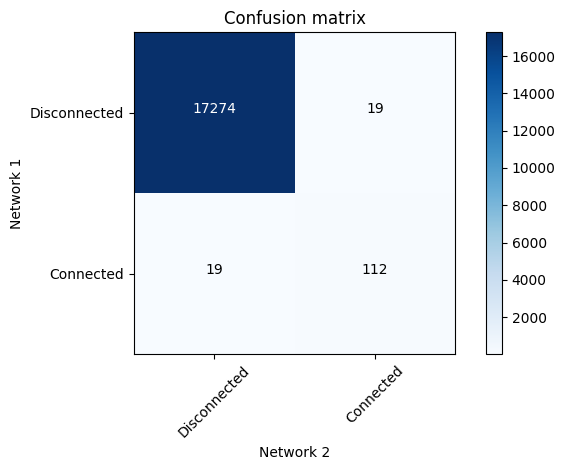

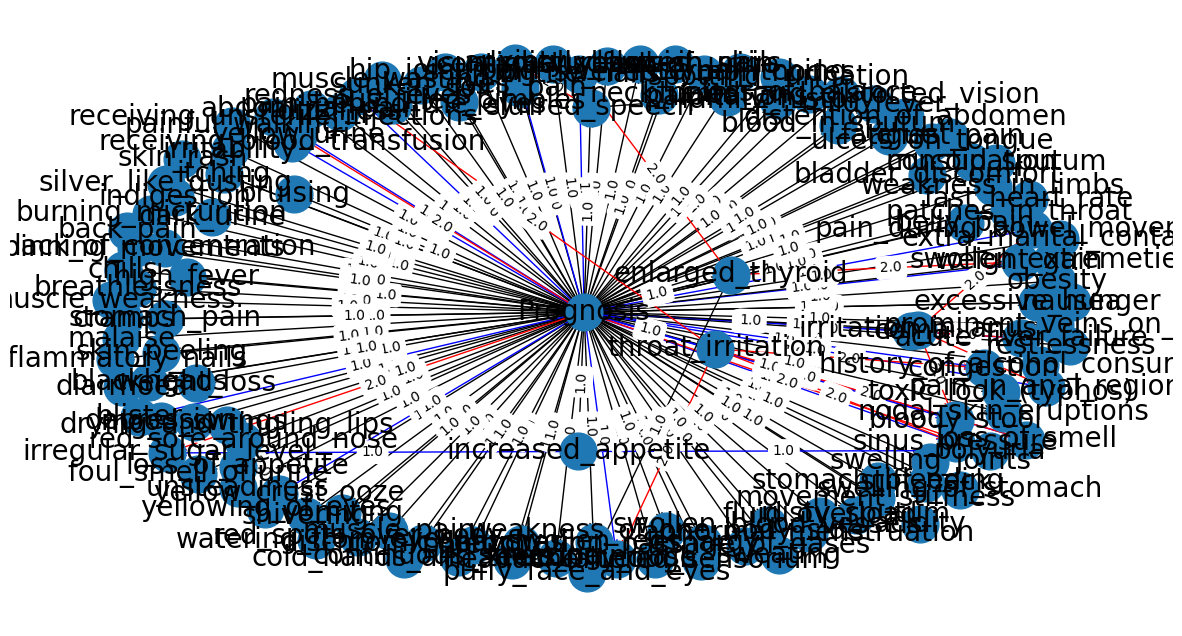

(array([[17274,    19],
        [   19,   112]]),
 target                 Prognosis  fatigue  vomiting  high_fever  \
 source                                                            
 Prognosis                      0        1         1           1   
 fatigue                        0        0         0           0   
 vomiting                       0        0         0           0   
 high_fever                     0        0         0           0   
 loss_of_appetite               0        0         0           0   
 ...                          ...      ...       ...         ...   
 puffy_face_and_eyes            0        0         0           0   
 yellow_urine                   0        0         0           0   
 polyuria                       0        0         0           0   
 irregular_sugar_level          0        0         0           0   
 palpitations                   0        0         0           0   
 
 target                 loss_of_appetite  nausea  headache  abdo

In [ ]:
bn.compare_networks(dag_train, dag_test)

In [ ]:
query = bn.inference.fit(model_test, variables=['Prognosis'], evidence = {'itching':1, 'skin_rash':1, 'dischromic _patches':1})
query.df.sort_values('p', ascending=False)

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+-----------------------------------------+------------+
|    | Prognosis                               |          p |
+====+=========================================+============+
|  0 | (vertigo) Paroymsal  Positional Vertigo | 0.00629285 |
+----+-----------------------------------------+------------+
|  1 | AIDS                                    | 0.00931482 |
+----+-----------------------------------------+------------+
|  2 | Acne                                    | 0.0292733  |
+----+-----------------------------------------+------------+
|  3 | Alcoholic hepatitis                     | 0.0100258  |
+----+-----------------------------------------+------------+
|  4 | Allergy                                 | 0.00689288 |
+----+-----------------------------------------+------------+
|  5 | Arthritis                               | 0.0081023

Prognosis         p
15                         Fungal infection  0.334263
8                               Chicken pox  0.110143
14                            Drug Reaction  0.099463
27                                 Impetigo  0.033867
9                       Chronic cholestasis  0.032993
35                                Psoriasis  0.031833
19                              Hepatitis B  0.030692
28                                 Jaundice  0.029273
2                                      Acne  0.029273
11                                   Dengue  0.027510
3                       Alcoholic hepatitis  0.010026
38                  Urinary tract infection  0.009660
29                                  Malaria  0.009315
1                                      AIDS  0.009315
6                          Bronchial Asthma  0.008677
36                             Tuberculosis  0.008677
7                      Cervical spondylosis  0.008382
34                                Pneumonia  0.008382
16                                     GERD  0.008382
22                              Hepatitis E  0.008382
10                              Common Cold  0.008102
26                           Hypothyroidism  0.008102
5                                 Arthritis  0.008102
37                                  Typhoid  0.007836
39                           Varicose veins  0.007836
12                                Diabetes   0.007836
24                          Hyperthyroidism  0.007583
25                             Hypoglycemia  0.007583
23                            Hypertension   0.007583
33                      Peptic ulcer diseae  0.007583
17                          Gastroenteritis  0.007342
30                                 Migraine  0.007342
21                              Hepatitis D  0.006893
4                                   Allergy  0.006893
31                          Osteoarthristis  0.006684
13             Dimorphic hemmorhoids(piles)  0.006684
40                              hepatitis A  0.006684
32             Paralysis (brain hemorrhage)  0.006484
0   (vertigo) Paroymsal  Positional Vertigo  0.006293
18                             Heart attack  0.006110
20                              Hepatitis C  0.005935

# **Modelo: *Naive Bayes***

[bnlearn] >Computing best DAG using [nb]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


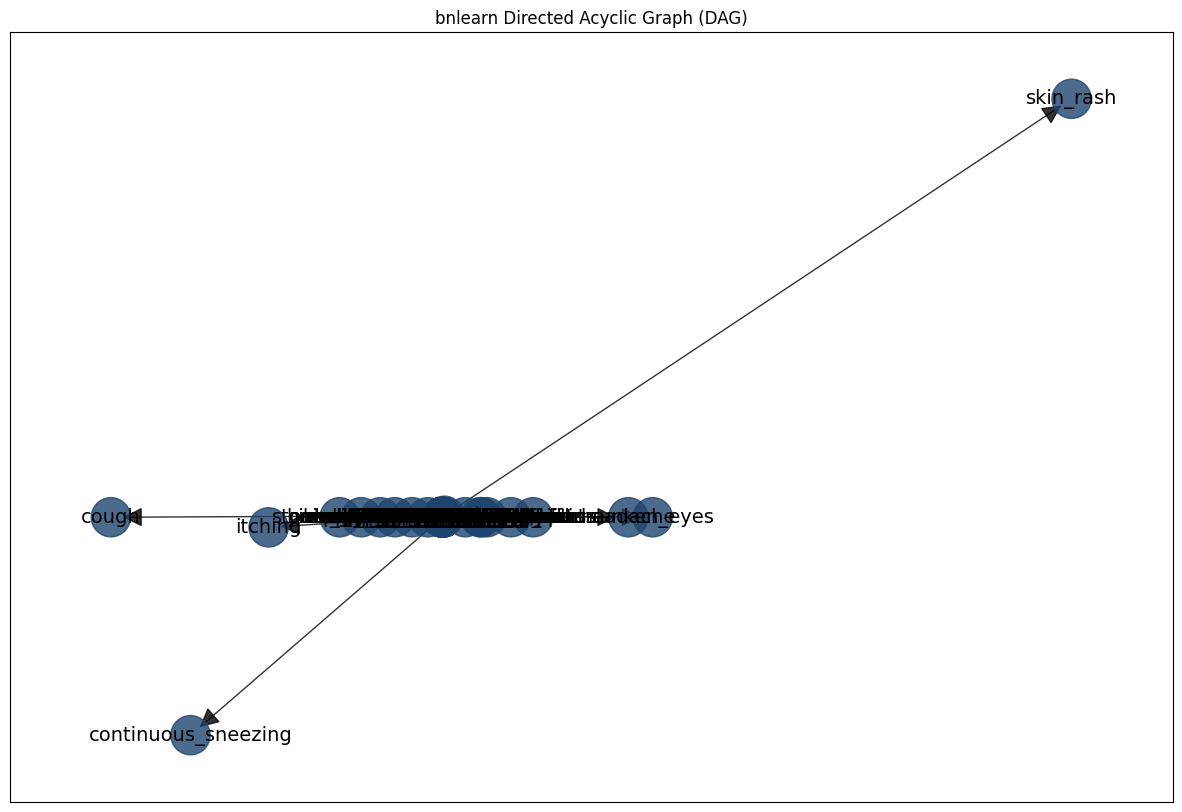

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'Prognosis': array([-8.13925247e-17, -3.56832992e-17]),
  'itching': array([-0.23402503, -0.02776032]),
  'skin_rash': array([0.83585308, 1.        ]),
  'continuous_sneezing': array([-0.33809379, -0.52618157]),
  'shivering': array([ 0.04789817, -0.00348483]),
  'stomach_pain': array([-0.13941312, -0.00348483]),
  'acidity': array([-0.04284371, -0.00348483]),
  'vomiting': array([-0.06595291, -0.00348483]),
  'indigestion': array([ 0.08897082, -0.00348483]),
  'muscle_wasting': array([-0.02169808, -0.00348483]),
  'patches_in_throat': array([ 0.05665792, -0.00348483]),
  'fatigue': array([-0.08525546, -0.00348483]),
  'weight_loss': array([-0.11063352, -0.00348483]),
  'sunken_eyes': array([ 0.27774614, -0.00348483]),
  'cough': array([-0.44416383, -0.00348483]),
  'headache': array([ 0.24518846, -0.00348483]),
  'chest_pain': array([-0.00235623, -0.00348483]),
  'back_pain': array([-0.00

In [ ]:
dag_train_nb = bn.structure_learning.fit(df_train,  methodtype = 'nb',  root_node = 'Prognosis')
bn.plot(dag_train_nb)

In [ ]:
model_train_nb = bn.parameter_learning.fit(dag_train_nb, df_train)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.models.NaiveBayes.NaiveBayes'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Prognosis:
+----------------------------------------------------+-----------+
| Prognosis((vertigo) Paroymsal  Positional Vertigo) | 0.0228151 |
+----------------------------------------------------+-----------+
| Prognosis(AIDS)                                    | 0.0255154 |
+----------------------------------------------------+-----------+
| Prognosis(Acne)                                    | 0.0237152 |
+----------------------------------------------------+-----------+
| Prognosis(Alcoholic hepatitis)                     | 0.0259654 |
+----------------------------------------------------+-----------+
| Prognosis(Allergy)                                 | 0.0234902 |
+----------------------------------------------------+-----------+
| Prognosis(Arthritis)  

In [ ]:
dag_test_nb = bn.structure_learning.fit(df_test,  methodtype = 'nb', root_node = 'Prognosis')

[bnlearn] >Computing best DAG using [nb]
[bnlearn] >Compute structure scores for model comparison (higher is better).


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


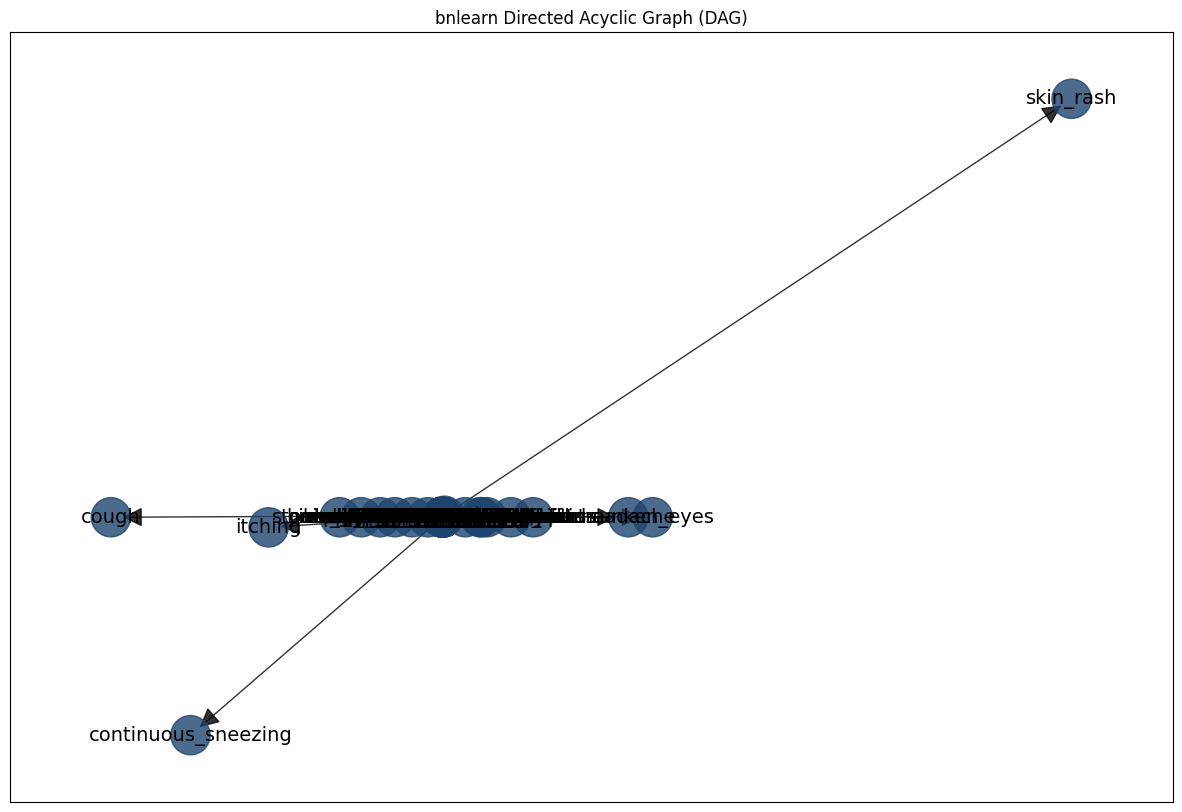

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'Prognosis': array([-8.13925247e-17, -3.56832992e-17]),
  'itching': array([-0.23402503, -0.02776032]),
  'skin_rash': array([0.83585308, 1.        ]),
  'continuous_sneezing': array([-0.33809379, -0.52618157]),
  'shivering': array([ 0.04789817, -0.00348483]),
  'stomach_pain': array([-0.13941312, -0.00348483]),
  'acidity': array([-0.04284371, -0.00348483]),
  'vomiting': array([-0.06595291, -0.00348483]),
  'indigestion': array([ 0.08897082, -0.00348483]),
  'muscle_wasting': array([-0.02169808, -0.00348483]),
  'patches_in_throat': array([ 0.05665792, -0.00348483]),
  'fatigue': array([-0.08525546, -0.00348483]),
  'weight_loss': array([-0.11063352, -0.00348483]),
  'sunken_eyes': array([ 0.27774614, -0.00348483]),
  'cough': array([-0.44416383, -0.00348483]),
  'headache': array([ 0.24518846, -0.00348483]),
  'chest_pain': array([-0.00235623, -0.00348483]),
  'back_pain': array([-0.00

In [ ]:
bn.plot(dag_test_nb)

In [ ]:
model_test_nb = bn.parameter_learning.fit(dag_test_nb, df_test)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.models.NaiveBayes.NaiveBayes'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Prognosis:
+----------------------------------------------------+-----------+
| Prognosis((vertigo) Paroymsal  Positional Vertigo) | 0.0272174 |
+----------------------------------------------------+-----------+
| Prognosis(AIDS)                                    | 0.0223709 |
+----------------------------------------------------+-----------+
| Prognosis(Acne)                                    | 0.0256019 |
+----------------------------------------------------+-----------+
| Prognosis(Alcoholic hepatitis)                     | 0.0215631 |
+----------------------------------------------------+-----------+
| Prognosis(Allergy)                                 | 0.0260058 |
+----------------------------------------------------+-----------+
| Prognosis(Arthritis)  

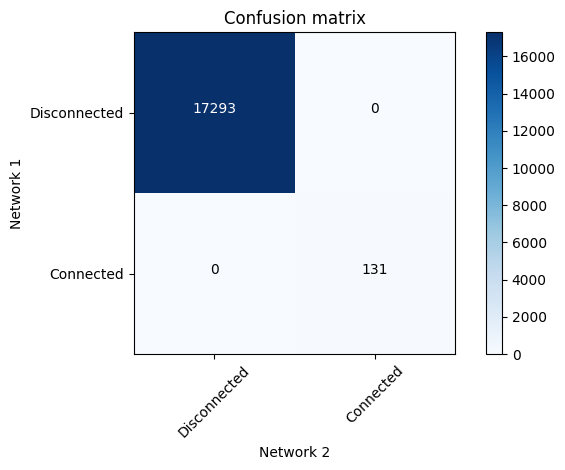

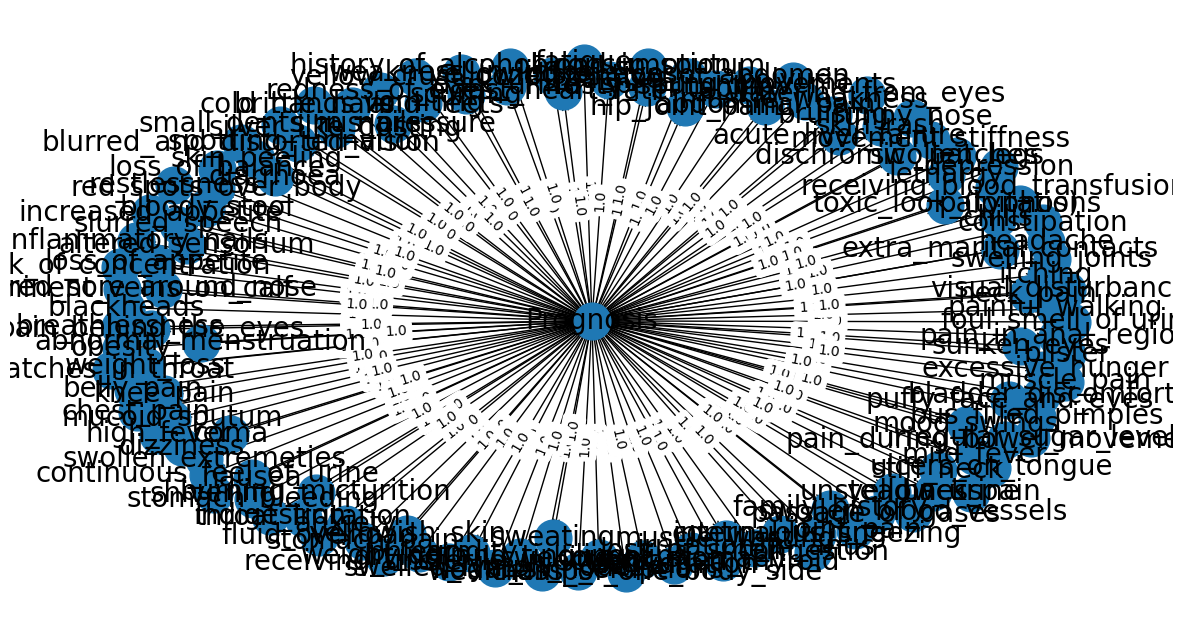

(array([[17293,     0],
        [    0,   131]]),
 target               Prognosis  itching  skin_rash  continuous_sneezing  \
 source                                                                    
 Prognosis                    0        1          1                    1   
 itching                      0        0          0                    0   
 skin_rash                    0        0          0                    0   
 continuous_sneezing          0        0          0                    0   
 shivering                    0        0          0                    0   
 ...                        ...      ...        ...                  ...   
 stomach_bleeding             0        0          0                    0   
 runny_nose                   0        0          0                    0   
 congestion                   0        0          0                    0   
 blood_in_sputum              0        0          0                    0   
 loss_of_smell                0       

In [ ]:
bn.compare_networks(dag_train_nb, dag_test_nb)

In [ ]:
query_nb = bn.inference.fit(model_test_nb, variables=['Prognosis'], evidence = {'itching':1, 'skin_rash':1, 'dischromic _patches':1})
query_nb.df.sort_values('p', ascending=False)

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+-----------------------------------------+------------+
|    | Prognosis                               |          p |
+====+=========================================+============+
|  0 | (vertigo) Paroymsal  Positional Vertigo | 0.00629285 |
+----+-----------------------------------------+------------+
|  1 | AIDS                                    | 0.00931482 |
+----+-----------------------------------------+------------+
|  2 | Acne                                    | 0.0292733  |
+----+-----------------------------------------+------------+
|  3 | Alcoholic hepatitis                     | 0.0100258  |
+----+-----------------------------------------+------------+
|  4 | Allergy                                 | 0.00689288 |
+----+-----------------------------------------+------------+
|  5 | Arthritis                               | 0.0081023

Prognosis         p
15                         Fungal infection  0.334263
8                               Chicken pox  0.110143
14                            Drug Reaction  0.099463
27                                 Impetigo  0.033867
9                       Chronic cholestasis  0.032993
35                                Psoriasis  0.031833
19                              Hepatitis B  0.030692
28                                 Jaundice  0.029273
2                                      Acne  0.029273
11                                   Dengue  0.027510
3                       Alcoholic hepatitis  0.010026
38                  Urinary tract infection  0.009660
29                                  Malaria  0.009315
1                                      AIDS  0.009315
6                          Bronchial Asthma  0.008677
36                             Tuberculosis  0.008677
7                      Cervical spondylosis  0.008382
34                                Pneumonia  0.008382
16                                     GERD  0.008382
22                              Hepatitis E  0.008382
10                              Common Cold  0.008102
26                           Hypothyroidism  0.008102
5                                 Arthritis  0.008102
37                                  Typhoid  0.007836
39                           Varicose veins  0.007836
12                                Diabetes   0.007836
24                          Hyperthyroidism  0.007583
25                             Hypoglycemia  0.007583
23                            Hypertension   0.007583
33                      Peptic ulcer diseae  0.007583
17                          Gastroenteritis  0.007342
30                                 Migraine  0.007342
21                              Hepatitis D  0.006893
4                                   Allergy  0.006893
31                          Osteoarthristis  0.006684
13             Dimorphic hemmorhoids(piles)  0.006684
40                              hepatitis A  0.006684
32             Paralysis (brain hemorrhage)  0.006484
0   (vertigo) Paroymsal  Positional Vertigo  0.006293
18                             Heart attack  0.006110
20                              Hepatitis C  0.005935

# **Modelo: *Bayesian Network***



In [ ]:
df2_reset = df2.reset_index()                                                           # Se reestablecen los índices
train_data, test_data = train_test_split(df2_reset, test_size=0.2, random_state=42)     # Dividir los datos en entrenamiento y prueba
model = BayesianNetwork([('Disease', symptom) for symptom in df2_reset.columns[1:]])    # Crear el modelo con las relaciones entre síntomas y enfermedades
model.fit(train_data, estimator=MaximumLikelihoodEstimator)                             # Entrenar el modelo con el estimador de máxima verosimilitud

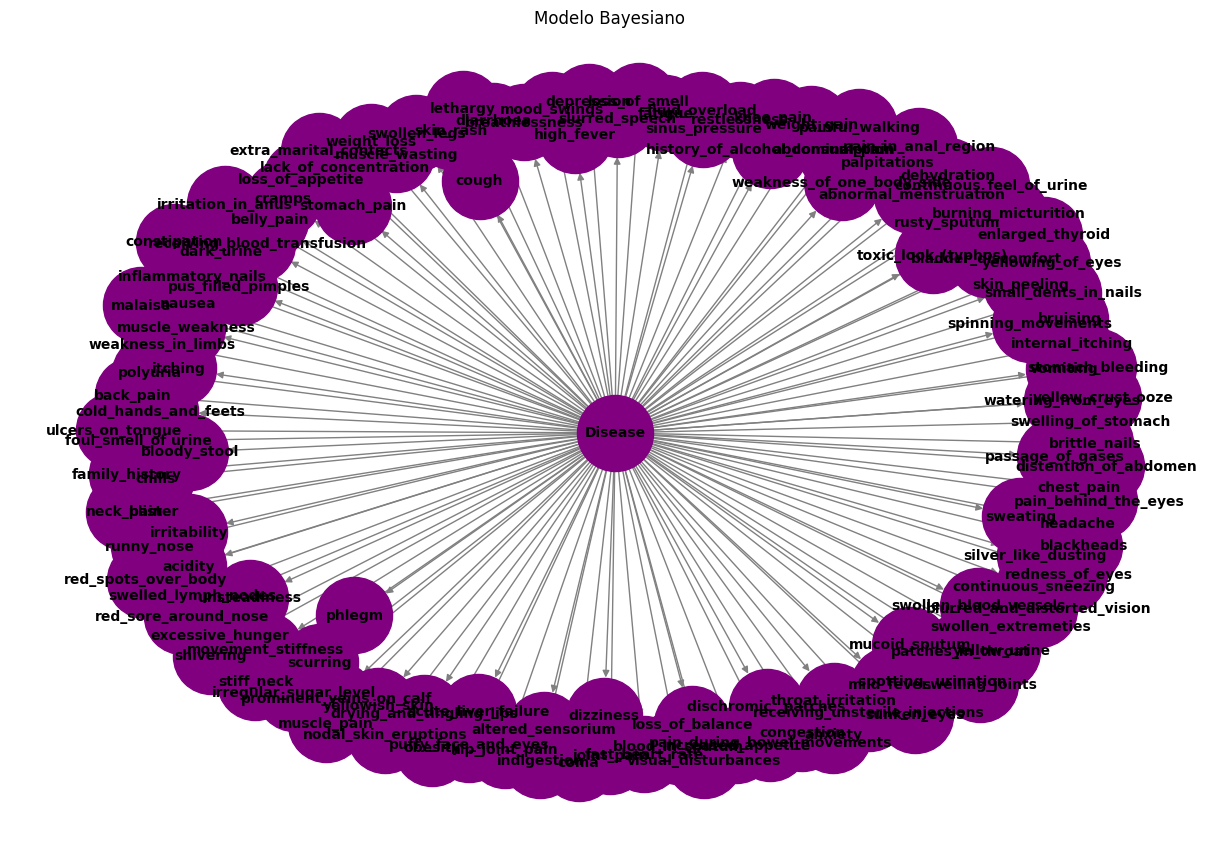

In [ ]:
plot = nx.DiGraph()                                                              # Crear un gráfico desde el modelo
plot.add_edges_from(model.edges())                                               # Agregar nodos y aristas al gráfico

plt.figure(figsize=(12, 8))                                                      # Imprimir la red
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='purple', edge_color='gray', node_size=3000, font_size=10, font_weight='bold')
plt.title('Modelo Bayesiano')
plt.show()


In [ ]:
inference = VariableElimination(model)                                         # Crear el objeto de inferencia con Variable Elimination
                                                                               # Ejemplo de evidencia
evidence = {'cough': 1, 'high_fever': 1}                                       # Se dan los sintomas que desean evaluar
result = inference.query(variables=['Disease'], evidence=evidence)             # Se obtiene la predicción
print(result)

+--------------------------------------------------+----------------+
| Disease                                          |   phi(Disease) |
+==================================================+================+
| Disease((vertigo) Paroymsal  Positional Vertigo) |         0.0000 |
+--------------------------------------------------+----------------+
| Disease(AIDS)                                    |         0.0000 |
+--------------------------------------------------+----------------+
| Disease(Acne)                                    |         0.0000 |
+--------------------------------------------------+----------------+
| Disease(Alcoholic hepatitis)                     |         0.0000 |
+--------------------------------------------------+----------------+
| Disease(Allergy)                                 |         0.0000 |
+--------------------------------------------------+----------------+
| Disease(Arthritis)                               |         0.0000 |
+-------------------

In [ ]:
test_predictions = model.predict(test_data.drop('Disease', axis=1))                # Realizar predicciones en el conjunto de prueba

test_predictions = test_predictions.reset_index(drop=True)                         # Ajustar índices para comparar predicciones
test_data = test_data.reset_index(drop=True)

correct_predictions = (test_predictions['Disease'] == test_data['Disease']).sum()  # Evaluar la precisión del modelo
incorrect_predictions = (test_predictions['Disease'] != test_data['Disease']).sum()

print("Predicciones correctas:", correct_predictions)
print("Predicciones incorrectas:", incorrect_predictions)

  0%|          | 0/251 [00:00<?, ?it/s]

Predicciones correctas: 984
Predicciones incorrectas: 0
